In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [515]:
# Axitinib Navitoclax Picolinici-acid Campthotecin BMS-754807 Afatinib Erlotinib
# EGFR
drug_name = 'Afatinib' # 靶向药物 EGFR
target_pathway = ['nt06267 Small cell lung cancer.','nt06266 Non-small cell lung cancer.','nt06214 PI3K signaling.','nt06526 MAPK signaling.','nt06230 Cell cycle.','nt06530 PI3K signaling.']

In [516]:
dict = {
    "<PAD>": 0,"<UNK>": 1,"<START>": 2,"<STOP>": 3,"(": 4,")": 5,"1": 6,"2": 7,"3": 8,"4": 9,"5": 10,"6": 11,"7": 12,"8": 13,"9": 14,"%10": 15,"%11": 16,"%12": 17,"%13": 18,"%14": 19,"%15": 20,"%16": 21,"%17": 22,"%18": 23,"%19": 24,"%20": 25,"%21": 26,"%22": 27,"%23": 28,"%24": 29,"%25": 30,"%26": 31,"%27": 32,"%28": 33,"%29": 34,"O": 35,"N": 36,"=": 37,"C": 38," ": 39,"Cl": 40,".": 41,"[Pt]": 42,"F": 43,"S": 44,"#": 45,"I": 46,"[Pt+2]": 47,"[NH-]": 48,"[O-]": 49,"[N+]": 50,"B": 51,"P": 52,"Br": 53,"[S+]": 54,"[Br-]": 55
}

In [517]:
df_smiles = pd.read_csv('../../data/CCLE-GDSC-SMILES.csv')
df_smiles.head()

,CID,SMILES,DRUG_NAME
0,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,Camptothecin
1,13342,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,Vinblastine
2,5702198,N.N.Cl[Pt]Cl,Cisplatin
3,6253,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,Cytarabine
4,148124,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,Docetaxel


In [518]:
# 筛选出药物是Oxaliplatin
df_smiles_single_drug = df_smiles[df_smiles['DRUG_NAME'] == drug_name]
df_smiles_single_drug.head()

,CID,SMILES,DRUG_NAME
15,10184653,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,Afatinib


In [519]:
df_smiles_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_smiles_attentions_gep.csv')
df_smiles_att.head()

,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,5-Fluorouracil,PCM,OPM2,0.002356,0.003071,0.002732,0.004914,0.004261,0.004978,0.001775,...,0.026119,0.028015,0.010345,0.021115,0.011152,0.008832,0.005626,0.006518,0.009014,0.005490
1,5-azacytidine,PCM,OPM2,0.002204,0.002897,0.002576,0.004770,0.004089,0.004820,0.001639,...,0.017020,0.008060,0.010243,0.006067,0.029940,0.015759,0.011790,0.008960,0.005428,0.005950
2,A-366,PCM,OPM2,0.002104,0.002775,0.002463,0.004676,0.003960,0.004714,0.001537,...,0.006011,0.005778,0.009135,0.004954,0.008338,0.016123,0.018105,0.010478,0.005555,0.005962
3,ABT737,PCM,OPM2,0.001874,0.002511,0.002220,0.004436,0.003700,0.004466,0.001332,...,0.005321,0.005187,0.006720,0.006663,0.007908,0.006287,0.005171,0.004562,0.009057,0.006331
4,AGI-5198,PCM,OPM2,0.001997,0.002653,0.002349,0.004567,0.003842,0.004599,0.001443,...,0.008812,0.008993,0.008153,0.015015,0.015713,0.017204,0.017644,0.010247,0.005821,0.006480


In [520]:
# 筛选出药物是Oxaliplatin
df_smiles_att_single_drug = df_smiles_att[df_smiles_att['drug'] == drug_name]
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
#'NCIH2172','CHAGOK1'
cell_line = ['NCIH2172','CHAGOK1']
df_smiles_att_single_drug = df_smiles_att_single_drug[df_smiles_att_single_drug['cell_line'].isin(cell_line)]
print(df_smiles_att_single_drug.shape)
df_smiles_att_single_drug.head()

(2, 259)


,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
12070,Afatinib,NSCLC,CHAGOK1,0.001984,0.002641,0.002337,0.004573,0.003843,0.004586,0.001442,...,0.005221,0.006934,0.010320,0.014339,0.007694,0.010160,0.014432,0.008794,0.013414,0.007082
12250,Afatinib,NSCLC,NCIH2172,0.001975,0.002638,0.002317,0.004592,0.003834,0.004581,0.001438,...,0.006496,0.005823,0.006197,0.004479,0.005842,0.011479,0.007557,0.005464,0.004098,0.004864


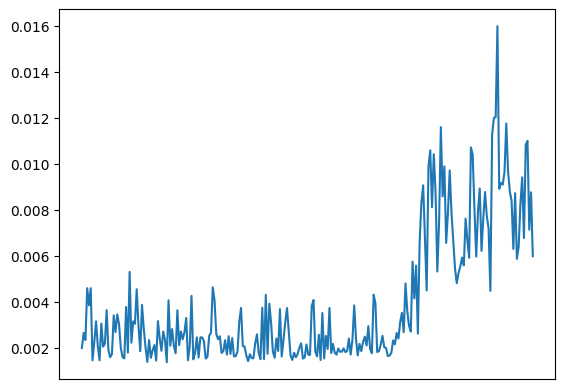

In [521]:
# 将df_smiles_att_oxaliplatin从第四列开始的数据取均值
df_smiles_att_single_drug_mean = df_smiles_att_single_drug.iloc[:, 3:].mean(axis=0)
# 将df_smiles_att_oxaliplatin_mean画成折线图
plt.plot(df_smiles_att_single_drug_mean)
# 不显示X轴的信息
plt.xticks([])
plt.show()

In [522]:
from pytoda.smiles import SMILESTokenizer
smiles_language_filepath = '../../../data/smiles_language/tokenizer_customized'
# Load SMILES language
smiles_language = SMILESTokenizer.from_pretrained(smiles_language_filepath)
smiles_language.set_encoding_transforms(
    add_start_and_stop=True,
    padding=True,
    padding_length=256,
    # padding_length=params.get("smiles_padding_length", None),
)
smiles_language.set_smiles_transforms(
    augment=False,
    canonical=False,
    kekulize=False,
    all_bonds_explicit=False,
    all_hs_explicit=False,
    remove_bonddir=False,
    remove_chirality=False,
    selfies=False,
    sanitize=False,
)
smiles_language.add_dataset(df_smiles['SMILES'])

In [523]:
single_drug = smiles_language.smiles_to_token_indexes(df_smiles[df_smiles['DRUG_NAME'] == drug_name]['SMILES'].values[0])
single_drug_num_array = np.array(single_drug)
type(single_drug_num_array)

numpy.ndarray

In [524]:
# 根据dict将Oxaliplatin从数字替换成字符
single_drug_strs = [list(dict.keys())[list(dict.values()).index(i)] for i in single_drug]
# 将Oxaliplatin转换成ndarray
single_drug_strs = np.array(single_drug_strs)
type(single_drug_strs)

numpy.ndarray

In [525]:
df_smiles_att_oxaliplatin_mean = df_smiles_att_single_drug_mean.to_numpy()
type(df_smiles_att_oxaliplatin_mean)

numpy.ndarray

In [526]:
single_drug_observe = np.vstack([single_drug_num_array, single_drug_strs, df_smiles_att_oxaliplatin_mean])
single_drug_observe

array([['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [527]:
start = 189
end = 255
# 取single_drug_observe224-255的数据
single_drug_observe_224_255 = single_drug_observe[:, start:end]
# dataframe
# single_drug_observe_224_255 = pd.DataFrame(single_drug_observe_224_255)
single_drug_observe_224_255

array([['38', '36', '4', '38', '5', '38', '38', '37', '38', '38', '4',
        '37', '35', '5', '36', '38', '6', '37', '38', '4', '38', '37',
        '38', '7', '38', '4', '37', '38', '6', '5', '38', '4', '37',
        '36', '38', '37', '36', '7', '5', '36', '38', '8', '37', '38',
        '38', '4', '37', '38', '4', '38', '37', '38', '8', '5', '43',
        '5', '40', '5', '35', '38', '9', '38', '38', '35', '38', '9'],
       ['C', 'N', '(', 'C', ')', 'C', 'C', '=', 'C', 'C', '(', '=', 'O',
        ')', 'N', 'C', '1', '=', 'C', '(', 'C', '=', 'C', '2', 'C', '(',
        '=', 'C', '1', ')', 'C', '(', '=', 'N', 'C', '=', 'N', '2', ')',
        'N', 'C', '3', '=', 'C', 'C', '(', '=', 'C', '(', 'C', '=', 'C',
        '3', ')', 'F', ')', 'Cl', ')', 'O', 'C', '4', 'C', 'C', 'O', 'C',
        '4'],
       ['0.0055659755000000005', '0.0026056865', '0.006577863999999999',
        '0.008311567', '0.0090601615', '0.006728583', '0.0044863245',
        '0.009878938', '0.010585493999999999', '0.0081

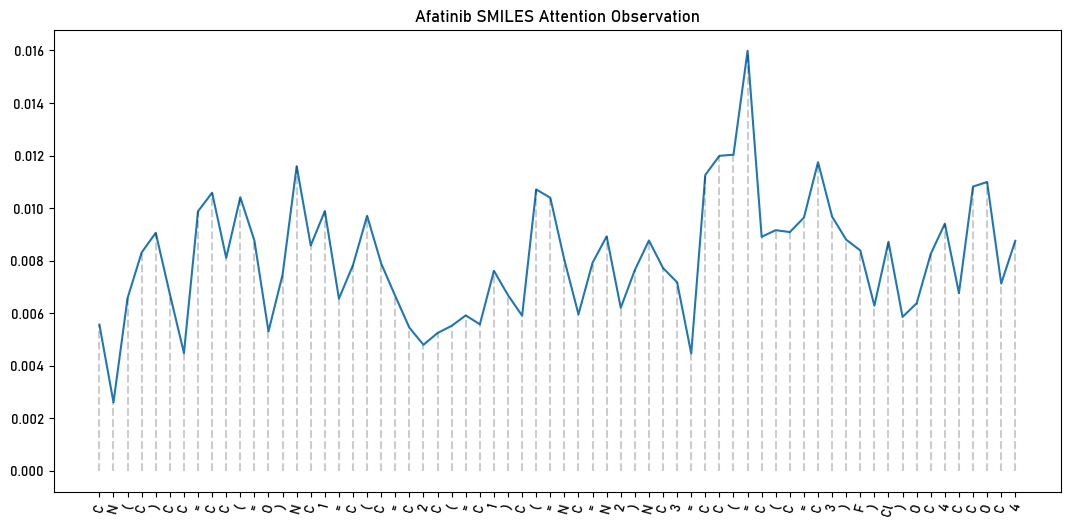

In [572]:
# 将single_drug_observe_224_255画成折线图,第三行是attention，是数值型，所以画成折线图
# 将single_drug_observe_224_255[2]变成浮点数  
single_drug_observe_y = single_drug_observe_224_255[2].astype(float)
single_drug_observe_x = single_drug_observe_224_255[1]
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(13, 6))
plt.plot(single_drug_observe_y)
# 每个点与X轴加上虚线
for i in range(len(single_drug_observe_y)):
    plt.vlines(i, 0, single_drug_observe_y[i], linestyles='dashed', colors='black', alpha=0.2)
# title
plt.title(drug_name + ' SMILES Attention Observation')
plt.xticks(rotation=75)
plt.xticks(np.arange(end - start), single_drug_observe_x)
plt.savefig(drug_name + '_SMILES_Attention_Observation.png', dpi=300, bbox_inches='tight')
plt.show()

In [529]:
df_pathways_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')
# 筛选出drug = Oxaliplatin
df_pathways_att_single_drug = df_pathways_att[df_pathways_att['drug'] == drug_name]
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_pathways_att_single_drug = df_pathways_att_single_drug[df_pathways_att_single_drug['cell_line'].isin(cell_line)]
print(df_pathways_att_single_drug.shape)
df_pathways_att_single_drug.head()

(2, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
12070,Afatinib,CHAGOK1,NSCLC,0.001359,0.001607,0.001531,0.001483,0.001736,0.001576,0.001576,...,0.001532,0.001432,0.001484,0.001404,0.001402,0.001557,0.002654,0.001390,0.002328,0.001512
12250,Afatinib,NCIH2172,NSCLC,0.001360,0.001518,0.001533,0.001396,0.001740,0.001577,0.001577,...,0.001533,0.001409,0.001499,0.001399,0.001402,0.001733,0.002470,0.001419,0.002408,0.001519


In [530]:
# 将df_pathways_att_oxaliplatin从第四列开始的数据取均值
df_pathways_single_drug_mean = df_pathways_att_single_drug.iloc[:, 3:].mean(axis=0)
df_pathways_single_drug_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            0.001359
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.001563
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      0.001532
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.001439
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.001738
dtype: float64

In [551]:
df_pathways_info_origin = pd.read_csv('../../../data/pathways/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
df_pathways_info_origin.head()

,Unnamed: 0,pathway_id,pathway_type,pathway_class,pathway_name
0,0,N01394,Env factor,nt06252 Mitochondrial ROS formation.,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...
1,1,N01401,Env factor,nt06251 CYP-mediated ROS formation.,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...
2,2,N01352,Env factor,nt06210 ERK signaling.,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...
3,3,N01386,Env factor,nt06250 DNA adduct formation.,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS
4,4,N01364,Env factor,nt06227 Nuclear receptor signaling.,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...


In [552]:
# 筛选出pathway_class是target_pathway的数据  暂时抛弃
# df_pathways_info = df_pathways_info[df_pathways_info['pathway_class'].isin(target_pathway)]
# 筛选出df_pathways_info中pathway_name包含EGFR或者ERBB2的数据
df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_name'].str.contains('EGFR|ERBB2')]
df_pathways_info.head()

,Unnamed: 0,pathway_id,pathway_type,pathway_class,pathway_name
61,61,N00367,Pathogen,nt06166 Human papillomavirus (HPV).,KEGG_MEDICUS_PATHOGEN_HPV_E5_TO_EGFR_RAS_ERK_S...
122,122,N00284,Reference,nt06260 Colorectal cancer.,KEGG_MEDICUS_REFERENCE_AREG_EGFR_PI3K_SIGNALIN...
123,123,N00279,Reference,nt06260 Colorectal cancer.,KEGG_MEDICUS_REFERENCE_AREG_EGFR_RAS_ERK_SIGNA...
218,218,N01078,Reference,nt06135 Cytoskeletal regulation (viruses and b...,KEGG_MEDICUS_REFERENCE_EGF_EGFR_ACTIN_SIGNALIN...
219,219,N00390,Reference,nt06214 PI3K signaling.,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGN...


In [553]:
df_gep = pd.read_csv('../../data/GeneExp_Wilcoxon_test_Analysis_Log10_P_value_C2_KEGG_MEDICUS.csv')
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_gep = df_gep[df_gep['cell_line'].isin(cell_line)]
# 从第二列开始取均值
df_gep_mean = df_gep.iloc[:, 1:].mean(axis=0)
df_gep_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            4.547003
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.800525
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      1.896939
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.561307
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.717917
dtype: float64

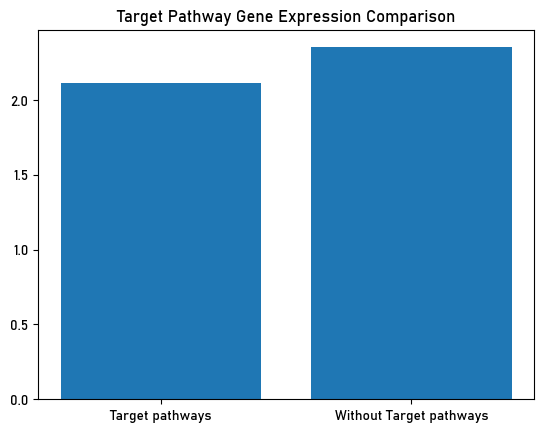

In [534]:
# 从df_gep_mean取出DNA_replication的数据
df_gep_mean_DNA_replication = df_gep_mean[df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
df_gep_mean_without_DNA_replication = df_gep_mean[~df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_gep_mean_DNA_replication.mean(), df_gep_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Gene Expression Comparison')
plt.show()

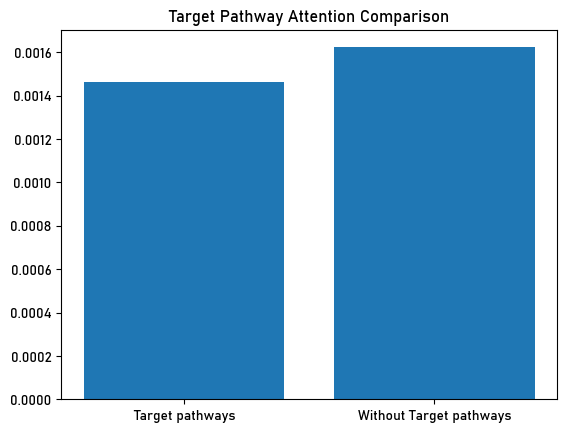

In [535]:
DNA_replication_pathways = df_pathways_info['pathway_name']
# 从df_pathways_att_oxaliplatin_mean取出DNA_replication_pathways的数据
df_pathways_att_oxaliplatin_mean_DNA_replication = df_pathways_single_drug_mean[df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
df_pathways_att_mean_without_DNA_replication = df_pathways_single_drug_mean[~df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_pathways_att_oxaliplatin_mean_DNA_replication.mean(), df_pathways_att_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Attention Comparison')
plt.show()

In [536]:
# 将df_pathways_single_drug_mean设置为dataframe
df_pathways_single_drug_mean = pd.DataFrame(df_pathways_single_drug_mean)
df_pathways_single_drug_mean.columns = ['attention']
df_pathways_single_drug_mean['pathway_name'] = df_pathways_single_drug_mean.index

In [537]:
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
# 根据attention排序
df_pathways_single_drug_mean = df_pathways_single_drug_mean.sort_values(by='attention', ascending=False)
print(df_pathways_single_drug_mean.shape)
df_pathways_single_drug_mean.head()

(619, 2)


,attention,pathway_name
208,0.002665,KEGG_MEDICUS_REFERENCE_DNA_DEGRADATION_BY_EXTR...
389,0.002664,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...
288,0.002662,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...
354,0.002661,KEGG_MEDICUS_REFERENCE_NOTCH_LIGAND_UBIQUITYLA...
526,0.002660,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_GRM1_T...


In [538]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head()

(29, 6)


,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002490,KEGG_MEDICUS_REFERENCE_TGFA_EGFR_PLCG_PKC_SIGN...,426,N00227,Reference,nt06263 Hepatocellular carcinoma.
1,0.001651,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_ERK_SIGNA...,223,N00023,Reference,nt06266 Non-small cell lung cancer.
2,0.001620,KEGG_MEDICUS_REFERENCE_TGFA_EGFR_RAS_ERK_SIGNA...,427,N00229,Reference,nt06260 Colorectal cancer.
3,0.001597,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_CAMK_SIGN...,222,N00026,Reference,nt06273 Glioma.
4,0.001597,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGN...,219,N00390,Reference,nt06214 PI3K signaling.


In [539]:
# 将df_pathways_single_drug_mean中pathway_name列存在在DNA_replication_pathways中，颜色标注为红色，其余为蓝色
df_pathways_single_drug_mean['color'] = np.where(df_pathways_single_drug_mean['pathway_name'].isin(DNA_replication_pathways), 'r', 'b')
# 重置索引
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
df_pathways_single_drug_mean.head(50)

,attention,pathway_name,color
0,0.002665,KEGG_MEDICUS_REFERENCE_DNA_DEGRADATION_BY_EXTR...,b
1,0.002664,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...,b
2,0.002662,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,b
3,0.002661,KEGG_MEDICUS_REFERENCE_NOTCH_LIGAND_UBIQUITYLA...,b
4,0.002660,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_GRM1_T...,b
5,0.002659,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...,b
6,0.002659,KEGG_MEDICUS_VARIANT_AMPLIFIED_MYCN_TO_TRANSCR...,b
7,0.002658,KEGG_MEDICUS_REFERENCE_BETA_OXIDATION_ACYL_COA...,b
8,0.002653,KEGG_MEDICUS_REFERENCE_ACTH_CORTISOL_SIGNALING...,b
9,0.002652,KEGG_MEDICUS_REFERENCE_GNRH_GNRHR_PLCB_PKC_SIG...,b


中值: 0.001532379


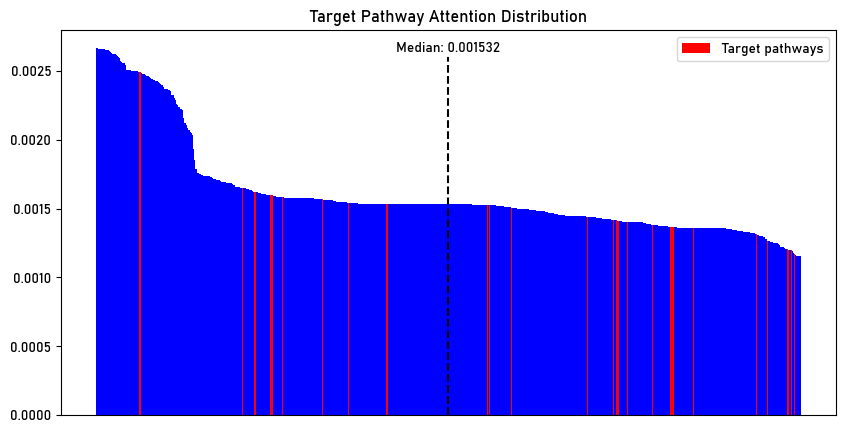

In [570]:
# 设置画布大小
plt.figure(figsize=(10, 5))
# 画出df_pathways_single_drug_mean的柱状图
plt.bar(df_pathways_single_drug_mean['pathway_name'], df_pathways_single_drug_mean['attention'], color=df_pathways_single_drug_mean['color'],width=1)
# 在柱状图的中值上画一条竖线,在竖线上标注中值
plt.vlines(309, 0, 0.0026, linestyles='dashed', colors='black', alpha=1)
# plt.text(309, 0.0026, 'Median', ha='center', va='bottom', fontsize=10)
# 在图中标注中值
plt.text(309, 0.00262, 'Median: 0.001532', ha='center', va='bottom', fontsize=10)
# 画一个label：红色代表Target pathways
plt.bar([0], [0], color='r', label='Target pathways')
# 画一个label：蓝色代表Without Target pathways
# plt.bar([0], [0], color='b', label='Without Target pathways')
# 显示label
plt.legend()
# 打印出中值
print('中值:',df_pathways_single_drug_mean['attention'].median())
plt.title('Target Pathway Attention Distribution')
plt.xticks([])
# 保存图片
plt.savefig(drug_name + '_NSCLC_Target_Pathway_Attention_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [541]:
# 帮我找出所有color为r的index
target_pathways = df_pathways_single_drug_mean[df_pathways_single_drug_mean['color'] == 'r']
# 将每个index除以618，得到比例
p = target_pathways.index / 618
print('所占百分比:',p)

所占百分比: Index([0.061488673139158574,  0.20711974110032363,  0.22491909385113268,
        0.24757281553398058,  0.24919093851132687,  0.26375404530744334,
        0.32038834951456313,  0.35760517799352753,  0.41262135922330095,
         0.5550161812297735,    0.558252427184466,   0.5889967637540453,
         0.6974110032362459,   0.7346278317152104,   0.7394822006472492,
         0.7411003236245954,   0.7540453074433657,   0.7896440129449838,
         0.8155339805825242,   0.8171521035598706,   0.8187702265372169,
         0.8203883495145631,   0.8478964401294499,   0.9385113268608414,
         0.9530744336569579,    0.982200647249191,   0.9838187702265372,
         0.9870550161812298,   0.9919093851132686],
      dtype='float64')


In [542]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head(100)

(29, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002490,KEGG_MEDICUS_REFERENCE_TGFA_EGFR_PLCG_PKC_SIGN...,r,426,N00227,Reference,nt06263 Hepatocellular carcinoma.
1,0.001651,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_ERK_SIGNA...,r,223,N00023,Reference,nt06266 Non-small cell lung cancer.
2,0.001620,KEGG_MEDICUS_REFERENCE_TGFA_EGFR_RAS_ERK_SIGNA...,r,427,N00229,Reference,nt06260 Colorectal cancer.
3,0.001597,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_CAMK_SIGN...,r,222,N00026,Reference,nt06273 Glioma.
4,0.001597,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGN...,r,219,N00390,Reference,nt06214 PI3K signaling.
5,0.001584,KEGG_MEDICUS_VARIANT_ERBB2_OVEREXPRESSION_TO_E...,r,504,N00095,Variant,nt06262 Pancreatic cancer.
6,0.001566,KEGG_MEDICUS_VARIANT_EGFR_OVEREXPRESSION_TO_PI...,r,498,N00042,Variant,nt06260 Colorectal cancer.
7,0.001543,KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_PI3K_SIGNA...,r,226,N00030,Reference,nt06260 Colorectal cancer.
8,0.001533,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_T...,r,522,N00014,Variant,nt06266 Non-small cell lung cancer.
9,0.001525,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_SIGNALING...,r,220,N00033,Reference,nt06260 Colorectal cancer.


In [555]:
# 将df_pathways_single_drug_mean与df_pathways_info_origin合并
df_pathways_single_drug_mean_merge_origin = pd.merge(df_pathways_single_drug_mean, df_pathways_info_origin, on='pathway_name')
print(df_pathways_single_drug_mean_merge_origin.shape)
df_pathways_single_drug_mean_merge_origin.head(200)

(619, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002665,KEGG_MEDICUS_REFERENCE_DNA_DEGRADATION_BY_EXTR...,b,208,N01571,Reference,nt06520 CGAS-STING signaling.
1,0.002664,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...,b,389,N01421,Reference,nt06027 Purine salvage pathway.
2,0.002662,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,b,288,N01090,Reference,nt06135 Cytoskeletal regulation (viruses and b...
3,0.002661,KEGG_MEDICUS_REFERENCE_NOTCH_LIGAND_UBIQUITYLA...,b,354,N01479,Reference,nt06511 NOTCH signaling.
4,0.002660,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_GRM1_T...,b,526,N00954,Variant,nt06462 Spinocerebellar ataxia.
...,...,...,...,...,...,...,...
195,0.001570,KEGG_MEDICUS_PATHOGEN_EBV_EBNA3C_TO_CELL_CYCLE...,b,25,N00483,Pathogen,nt06165 Epstein-Barr virus (EBV).
196,0.001569,KEGG_MEDICUS_ENV_FACTOR_NNK_TO_DNA_ADDUCTS,b,17,N01381,Env factor,nt06250 DNA adduct formation.
197,0.001569,KEGG_MEDICUS_REFERENCE_ITGA_B_FAK_RAC_SIGNALIN...,b,301,N01068,Reference,nt06135 Cytoskeletal regulation (viruses and b...
198,0.001566,KEGG_MEDICUS_VARIANT_EGFR_OVEREXPRESSION_TO_PI...,r,498,N00042,Variant,nt06260 Colorectal cancer.
